# 3.5.Cross_Validation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [53]:
df = pd.read_csv("all_penguins_clean.csv", index_col=0)
df

,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Real ID,Sex
studyName,,,,,,,,,,,,,,
PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,A_0,MALE
PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,A_1,FEMALE
PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,A_2,FEMALE
PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,A_3,NaN
PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,A_4,FEMALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PAL0910,120,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,G_339,NaN
PAL0910,121,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,G_340,FEMALE
PAL0910,122,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,G_341,MALE


In [4]:
species = df['Species']
species

studyName
PAL0708    Adelie
PAL0708    Adelie
PAL0708    Adelie
PAL0708    Adelie
PAL0708    Adelie
            ...  
PAL0910    Gentoo
PAL0910    Gentoo
PAL0910    Gentoo
PAL0910    Gentoo
PAL0910    Gentoo
Name: Species, Length: 344, dtype: object

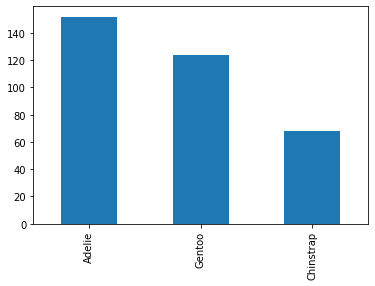

In [6]:
species.value_counts().plot.bar()

### sampling Bias
solution 1: balance classes
solution 2 :straficatioenforce proportions of classes

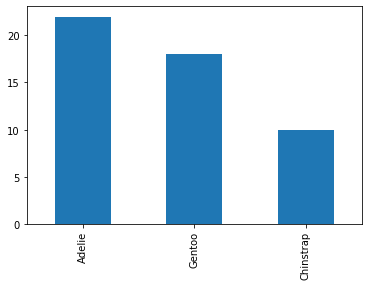

In [5]:
species.sample(50).value_counts().plot.bar()

In [30]:
df.dropna(inplace= True)
df ['mass'] = df['Body Mass (g)']/100.0
X = df[['Culmen Length (mm)','mass']]
y = df['Species']

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [35]:
m = LogisticRegression()

In [42]:
cross_val_score(m,X,y, cv=5, scoring='accuracy').round(3)  *(cv=kaça böleceksin?)

array([0.925, 0.955, 0.94 , 0.955, 0.97 ])

# Feature Enginnering Cleanup
One- Hot-Encoding

In [44]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
oh = OneHotEncoder(sparse=False)

# Scaling

### Step 1: fit() on the treining data

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler =  MinMaxScaler()
scaler.fit(df[['Culmen Length (mm)','Body Mass (g)']])
scaler.data_min_, scaler.data_max_

(array([  32.1, 2700. ]), array([  59.6, 6300. ]))

### Step 2:transform() the training data

In [50]:
Xt = scaler.transform(df[['Culmen Length (mm)','Body Mass (g)']])
Xt.shape

(334, 2)

### Step 3 :transform() the test data

In [51]:
test_data = pd.DataFrame({'Culmen Length (mm)' : [40.0,50.0,20.0], 'Body Mass (g)' : [4500,10000,3500]})

In [52]:
scaler.transform(test_data[['Culmen Length (mm)','Body Mass (g)']])

array([[ 0.28727273,  0.5       ],
       [ 0.65090909,  2.02777778],
       [-0.44      ,  0.22222222]])